<a href="https://colab.research.google.com/github/Bhavyaveer44/IEEE-CS-AI-ML-Task/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Shape: (60000, 785)

First 5 Rows:
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel7

<ipython-input-17-c533be1c2298>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


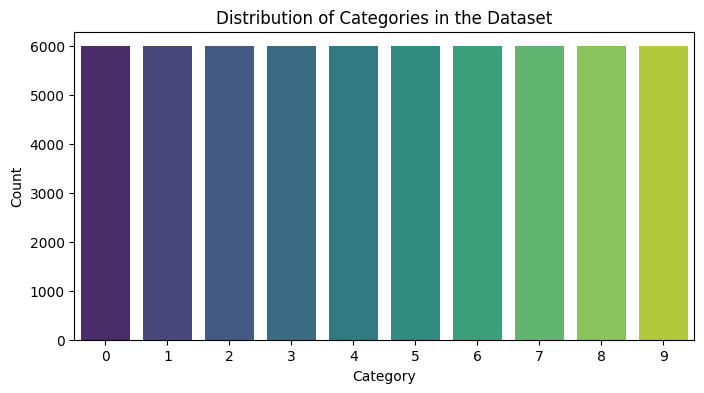

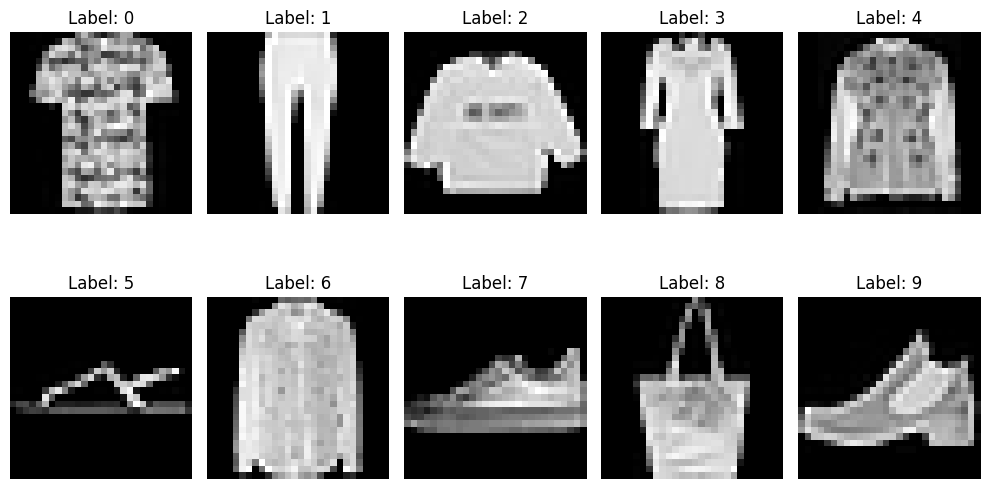


Summary Statistics of Pixel Values:
                0             1             2             3             4    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

                5             6             7             8             9    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
std        5.8

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("/content/data.csv")

print("\nDataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())


labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values

images = images.reshape(-1, 28, 28)

label_counts = pd.Series(labels).value_counts().sort_index()
print("\nLabel Distribution:\n", label_counts)

plt.figure(figsize=(8, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in the Dataset")
plt.show()


def plot_sample_images(images, labels):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(10, 6))

    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)[0][0]
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


plot_sample_images(images, labels)


pixel_values = images.reshape(-1, 784)
print("\nSummary Statistics of Pixel Values:")
print(pd.DataFrame(pixel_values).describe())


print("\nSample image pixel values (should be 0-255):\n", images[0])
print("Min pixel value:", images.min(), "| Max pixel value:", images.max())



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 69.47%


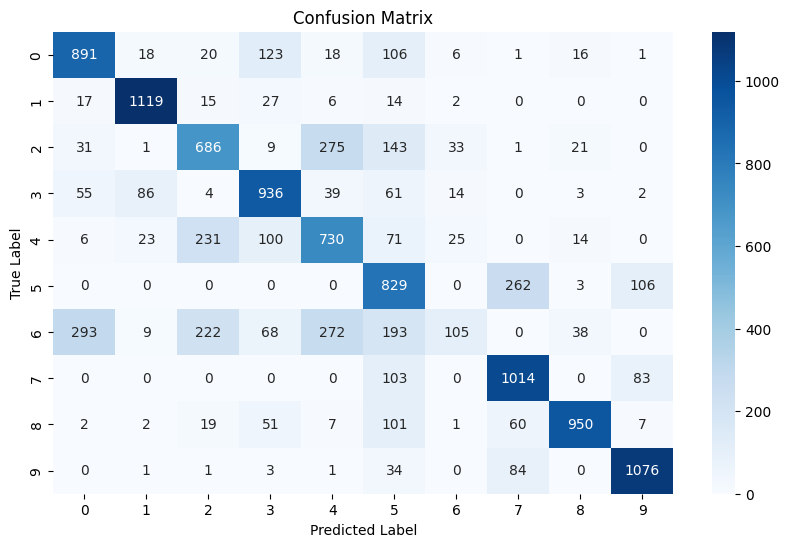

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      1200
           1       0.89      0.93      0.91      1200
           2       0.57      0.57      0.57      1200
           3       0.71      0.78      0.74      1200
           4       0.54      0.61      0.57      1200
           5       0.50      0.69      0.58      1200
           6       0.56      0.09      0.15      1200
           7       0.71      0.84      0.77      1200
           8       0.91      0.79      0.85      1200
           9       0.84      0.90      0.87      1200

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.67     12000
weighted avg       0.69      0.69      0.67     12000



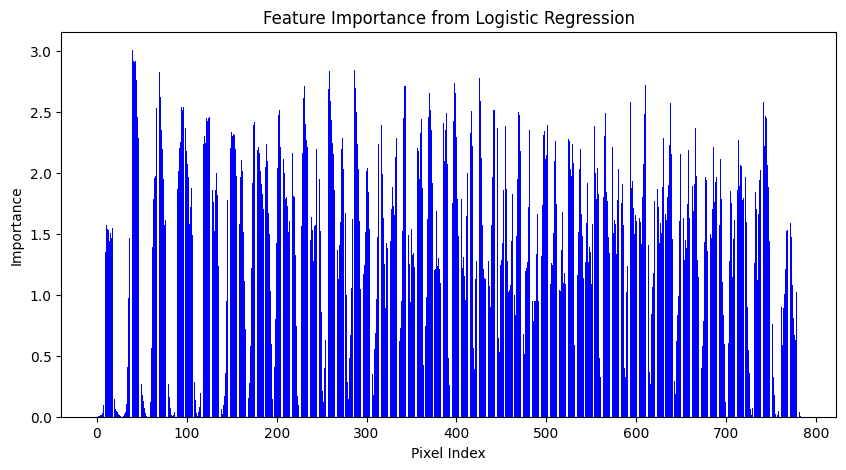

In [19]:
images = images / 255.0
images = images.reshape(images.shape[0], -1)

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

model = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
model.fit(images_train, labels_train)

labels_pred = model.predict(images_test)

accuracy = accuracy_score(labels_test, labels_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(labels_test, labels_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(labels_test, labels_pred))

importance = np.abs(model.coef_).mean(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(range(784), importance, color='blue')
plt.xlabel("Pixel Index")
plt.ylabel("Importance")
plt.title("Feature Importance from Logistic Regression")
plt.show()